### Mechanical failure 

Two examples using probabilistic programming.


https://www.kdnuggets.com/2020/07/complete-guide-survival-analysis-python-part1.html
https://square.github.io/pysurvival/tutorials/maintenance.html#references
https://github.com/DeepBhat/ConocoPhillipsDatathon
https://square.github.io/pysurvival/tutorials/maintenance.html#references

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
import arviz as az

from IPython.display import HTML, display

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

SMALL_SIZE = 15
MEDIUM_SIZE = 16
LARGE_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title


%load_ext autoreload
from covidhelp import *
%autoreload 2

%matplotlib inline
%precision 4
plt.style.use('dark_background')

Disclaimer:
    
Although these examples are related to COVID-19, neither I nor the organizations I am associated with are disease experts and we are not responsible for how this information is used.  This post is meant to demonstrate how to inform decision making with probabilistic programming. We use COVID-19 related examples in order to keep this work relevant to problems companies face today.  

## Overview

* INTRO: Brief introduction to Probabilistic Programming and Bayesian Statistics

* EXAMPLE I: Which sales representative should take a plane?

* EXAMPLE II: A case study on supply chain optimization

Read the objectives

## Introduction

* The majority of data science being applied in industry is <font style="color:blue">supervised learning</font>
* Supervised learning yields predictions, but translating predictions into business decisions can be difficult
* We are going to use a <font style="color:blue">Bayesian model</font> to inform decision making

Some of the reasons to consider the Bayesian approaches are that:

* We can find these best decisions over the range of possible scenarios 
* In this framework we can communicate results in the language business cares about

Some supervision learning offers insights into the importance of predictors depending on the model

## Bayesian Statistics


### Why you might want to use probabilistic programming
* <font style="color:blue">Customization</font> - We can create models that have built-in hypothesis tests
* <font style="color:blue">Propagation of uncertainty</font> - There is a degree of belief associated prediction and estimation
* <font style="color:blue">Intuition</font> - The models are essentially 'white-box' which provides insight into our data
* <font style="color:blue">Priors</font> - Offer both a way to include business knowledge and naturally update our degree of belief with new data

### There is no free lunch

* <p style="color:blue">Deep dive</p> - Generally requires a fairly deep understanding of statistics
* <p style="color:blue">Overhead</p> - Computational overhead might make it difficult to be production ready
* <p style="color:blue">Sometimes simple is enough</p> - The ability to customize models in almost a plug-n-play manner has to come with some cost. 


notes

## Bayes Formula


* $x$ - data
* $\theta$ - unknown quantities that we care about

$$
P(\theta|x) \propto \prod^{N}_{i=1} P(x_{i}|\theta)P(\theta)
$$

* <p style="color:blue">Posterior</p> 
  $P(\theta|x)$ - What we know about our unknowns having observed some data
* <p style="color:blue">Prior</p>
  $P(\theta)$ - Information that we have about our unknowns before we look at the data
* <p style="color:blue">Likelihood</p> 
  $P(x_{i}|\theta)$  - Probability distribution used to integrate data into our posterior

The posterior is what we know about theta after having observed y.  When Bayes formula is expressed in this form we see that the posterior is proportional to the likelihood time the prior.  That means they are equal to each other up to a constant.

## Example I - Which sales representative should travel?

Let's start with a simple example

If we wanted to model whether a deal will be signed or not signed based on a sales funnel a simple approach could be to use a Binomial distribution.  There is a parameter $p$ that governs the proportion of signed deals.

> It is a way to model a series of coin flips

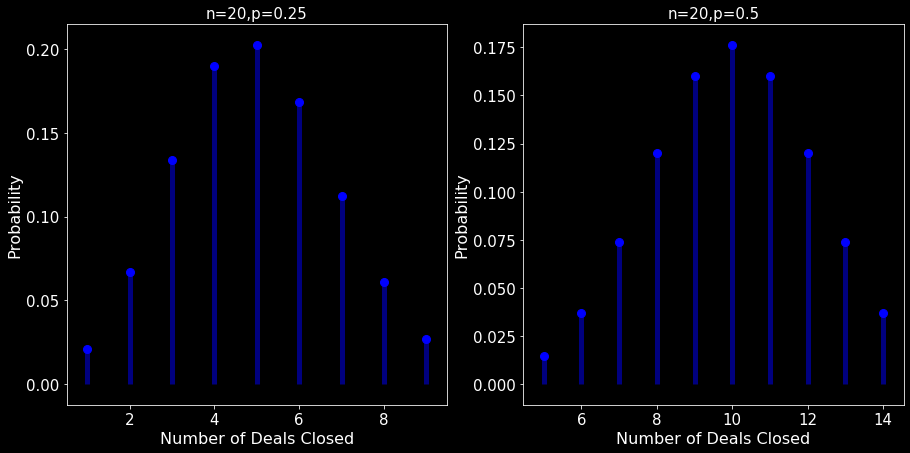

In [2]:
fig = plt.figure(figsize=(15,8))
axes = plot_example_binomial([(20,0.25),(20,0.5)],fig=fig)

logp = -15.064, ||grad|| = 25: 100%|██████████| 7/7 [00:00<00:00, 1907.37it/s]
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [p]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:00<00:00, 7812.38draws/s]
The number of effective samples is smaller than 25% for some parameters.


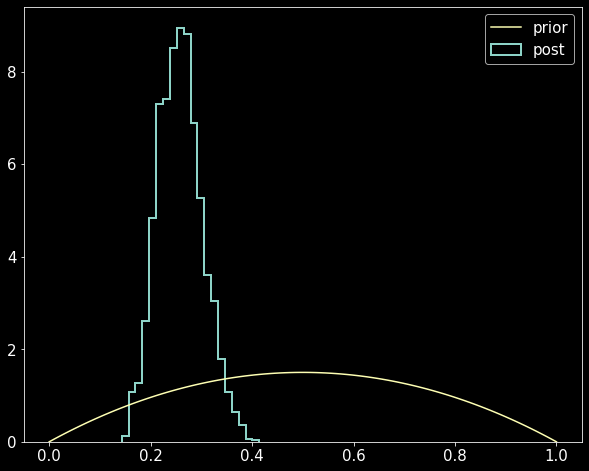

In [3]:
num_deals,deals_signed = 100,25          # data: the total number of deals and the number of deals closed 
alpha,beta = 2,2                         # prior: beta takes two positive shape parameters 

trace = run_binomial_model(num_deals,deals_signed,alpha,beta)
ax = plot_binomial_model(trace, alpha, beta)

Maybe you want to make an informed decision about who should travel to make this deal.  You could look at a plot that compares eligible reps.

In [4]:
def compare_sales_reps():
    alpha,beta = 2,2 
    traces = []
    subplot = 0
    for num_deals, deals_signed in [(100,25),(45,22),(75,11)]:    
        # context management
        with pm.Model() as model: 
            p = pm.Beta('p', alpha=alpha, beta=beta)
            y = pm.Binomial('y', n=num_deals, p=p, observed=deals_signed)

            start = pm.find_MAP()
            step = pm.Metropolis()
            trace = pm.sample(1000, step, start)
        
        traces.append(trace)
      
    return(traces)

traces = compare_sales_reps()

logp = -15.064, ||grad|| = 25: 100%|██████████| 7/7 [00:00<00:00, 1521.72it/s]
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [p]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:00<00:00, 7657.63draws/s]
The number of effective samples is smaller than 25% for some parameters.
logp = -1.7401, ||grad|| = 0.5: 100%|██████████| 5/5 [00:00<00:00, 2818.37it/s]
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [p]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:00<00:00, 6060.86draws/s]
The number of effective samples is smaller than 25% for some parameters.
logp = -22.361, ||grad|| = 26.5: 100%|██████████| 8/8 [00:00<00:00, 2599.10it/s]
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [p]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:00<00:00, 7676.50draws/s]
The number of effective samples is smaller than 25% for some parameters.


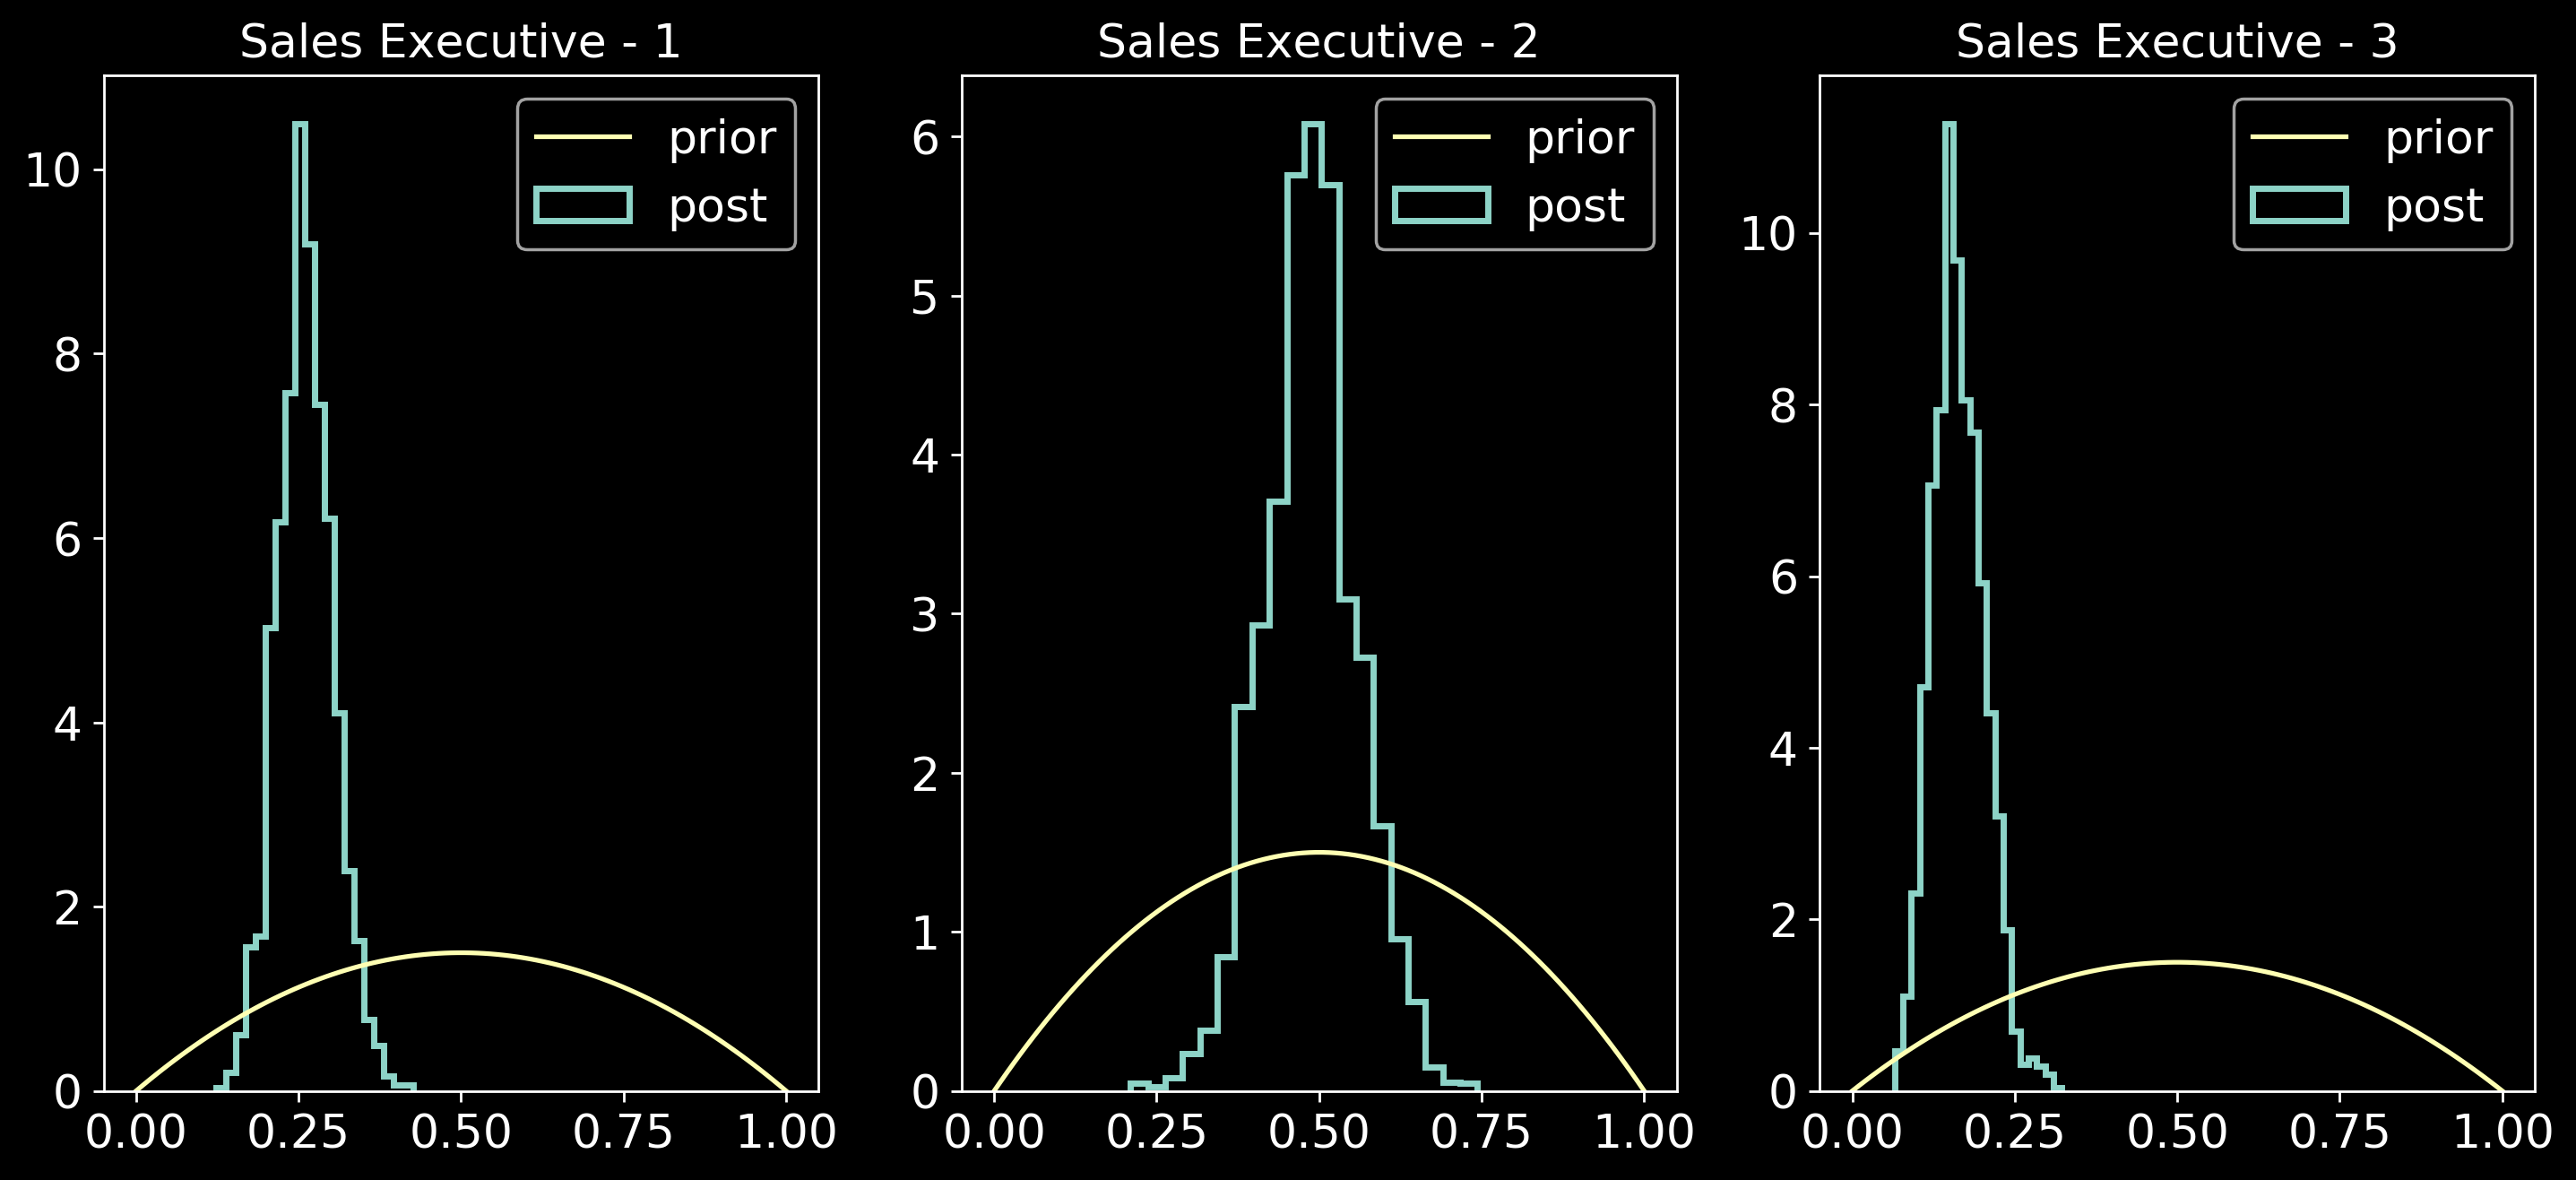

In [5]:
def plot_sales_reps():
    fig = plt.figure(figsize=(14,6),dpi=250)
    subplot = 0
    for i, args in enumerate([(100,25),(45,22),(75,11)]):
        num_deals, deals_signed = args
        subplot +=1
        ax = fig.add_subplot(1,3,subplot)
        
        trace = traces[i]
        
        ax = plot_binomial_model(trace, alpha, beta, ax=ax);
        ax.set_title("Sales Executive - {}".format(subplot))
    
plot_sales_reps()

So we could use this plot to help figure out who to send if we only wanted to consider past sales performance to make the decision.  In this example we have three features associated with the region where the sales reps would be traveling.  One factor could represent the last thirty days of data with respect to hospitalizations.  Another could relate to mortality rates. If we were modeling the month of June for example then it would then using the posterior numbers for the Month of May.

In [43]:
data_mu = [t['p'].mean() for t in traces]
data_std = [t['p'].std() for t in traces] 

## three factors for current month
factor1 = [1.0,0.1]
factor2 = [5.0,0.2]  
factor3 = [3.0,0.3]
multipliers = [1,2,1]

## prior numbers from previous month
mu_prior = 0.0
std_prior =  0.01

with pm.Model() as model:
    
    factor_1 = pm.Normal("factor 1", mu=factor1[0], sd=factor1[1])
    factor_2 = pm.Normal("factor 2", mu=factor2[0], sd=factor2[1])
    factor_3 = pm.Normal("factor 3", mu=factor3[0], sd=factor3[1])
    risk_estimate = multipliers[0] * factor1 + multipliers[1] * factor2 + multipliers[2] * factor3
    
    trace = pm.sample(50000, step=pm.Metropolis())
    burned_trace = trace[10000:]

risk_estimate = burned_trace["risk_estimate"]

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [factor 3]
>Metropolis: [factor 2]
>Metropolis: [factor 1]
Sampling 4 chains, 0 divergences: 100%|██████████| 202000/202000 [00:47<00:00, 4215.73draws/s]
The number of effective samples is smaller than 25% for some parameters.


KeyError: 'Unknown variable risk_estimate'

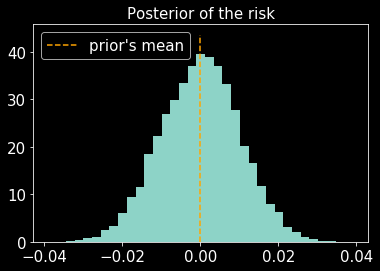

In [42]:
_hist = plt.hist(risk_estimate, bins = 35, density= True, histtype= "stepfilled")
plt.title("Posterior of the risk")
plt.vlines(mu_prior, 0, 1.1*np.max(_hist[0]), color='orange',label = "prior's mean",linestyles="--")
#plt.vlines(price_trace.mean(), 0, 1.1*np.max(_hist[0]), \
#           label = "posterior's mean", linestyles="-.")
plt.legend(loc = "upper left");

## Resources

* [Video Explaining Bayes Formula](https://www.youtube.com/watch?v=HZGCoVF3YvM)
* [Source Blog Post by Thomas Wiecki](https://github.com/twiecki/WhileMyMCMCGentlySamples/blob/master/content/downloads/notebooks/supply_chain.ipynb)


## Questions?

<img src="../images/galvanize-mdh.png" alt="galvanize-mdh" align="center" style="width: 200px;"/>

Please direct additional inquiries to pilar@mtydigitalhub.com